**Exercise set 12**
==============


>In this exercise, we will process signals and you will learn how you
>can remove noise, obtain numerical derivatives of noisy signals, and
>correct near-infrared spectra by removing unwanted scattering effects.


**Exercise 12.1**

In this exercise, we will test out the Savitzky&ndash;Golay filter for smoothing
and numerical differentiation. We will use a test signal which has been generated
from the following analytical function,
\begin{equation}
y(t) = \sin 8t - 1.8t^2 + 0.5t^3.
\label{eq:signal}
\tag{1}\end{equation}

The signal is available in the file `Data/signal.txt`.
In addition, we will investigate a test signal which is generated from the same
analytical function, but with noise added. This signal is available in the file
`Data/signal_noise.txt`.
In `scipy` a Savitzky&ndash;Golay filter can be created by using
the method `savgol_filter` from `scipy.signal`.(https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html)


**(a)**  Create a Savitzky&ndash;Golay smoothing filter with a window of size $5$
and polynomial order of $3$. Apply this filter to the signal without noise
and compare the filtered signal with the original signal.



<IPython.core.display.Javascript object>


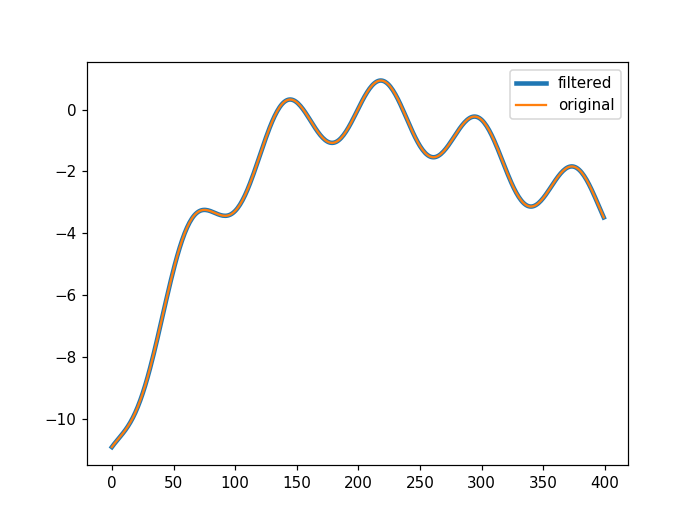

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

signal = np.loadtxt("Data/signal.txt", )
signal_noise = np.loadtxt("Data/signal_noise.txt")

filtered = savgol_filter(signal[:,1], window_length=5, polyorder=3)

plt.plot(filtered, label="filtered", lw=3) # Bigger line_width to show overlap
plt.plot(signal[:,1], label="original")
plt.legend();

**Answer to question 12.1(a):** They overlap completely

**(b)**  Create a Savitzky&ndash;Golay smoothing filter with a window of size $7$
and polynomial order of $3$. Apply this filter to the signal without noise
and compare the filtered signal with the original signal.



<IPython.core.display.Javascript object>


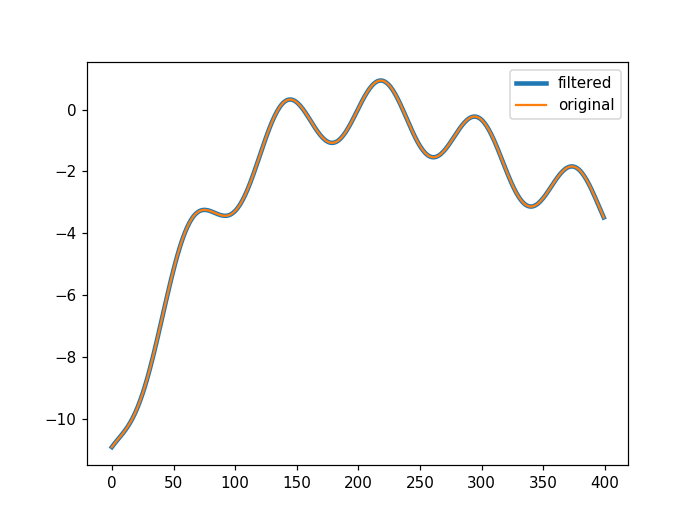

In [2]:
filtered = savgol_filter(signal[:,1], window_length=7, polyorder=3)

fig, ax = plt.subplots(1,1) # Needed to not replot in the previous figure

ax.plot(filtered, label="filtered", lw=3)
ax.plot(signal[:,1], label="original")
ax.legend();

**Answer to question 12.1(b):** Still perfect overlap

**(c)**  Create a Savitzky&ndash;Golay filter for first-order differentiation with a
window size of $5$ and polynomial order of $3$. Apply this to the signal
without noise and compare the differentiated signal with the analytical
derivative of Eq. 1. 

**Note:** In order to obtain the derivative,
you will have to supply the spacing between your points using the
`delta` parameter of the `savgol_filter` method.

<IPython.core.display.Javascript object>


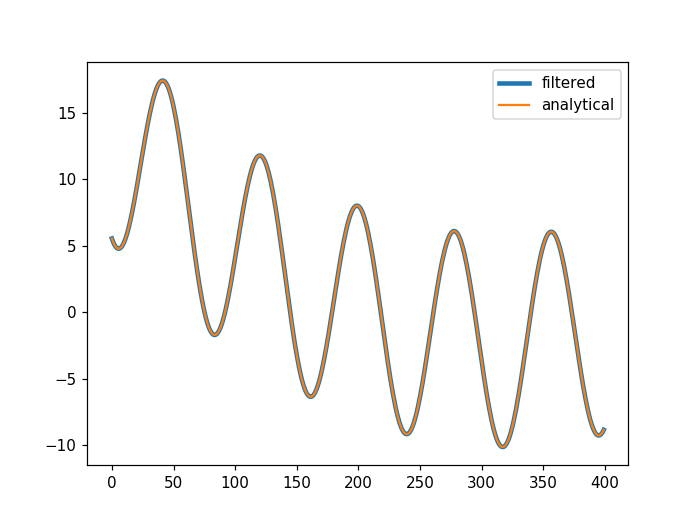

In [3]:
delta = signal[1,0]-signal[0,0] # Get the t spacing of the signal
filtered = savgol_filter(signal[:,1], window_length=5, polyorder=3, deriv=1, delta=delta)

t = signal[:,0]
analytical = 8*np.cos(8*t)-1.8*2*t+0.5*3*t**2

fig, ax = plt.subplots(1,1) # Needed to not replot in the previous figure
ax.plot(filtered, label="filtered", lw=3)
ax.plot(analytical, label="analytical")
ax.legend();

**Answer to question 12.1(c):** After making sure we give it the spacing between different signals with `delta` the filtered derivative is equal to the analyitical one.

**(d)**  Create a Savitzky&ndash;Golay filter for first-order differentiation with a
window size of $7$ and polynomial order of $3$. Apply this to the signal
without noise and compare the differentiated signal with the analytical
derivative of Eq. 1.



<IPython.core.display.Javascript object>


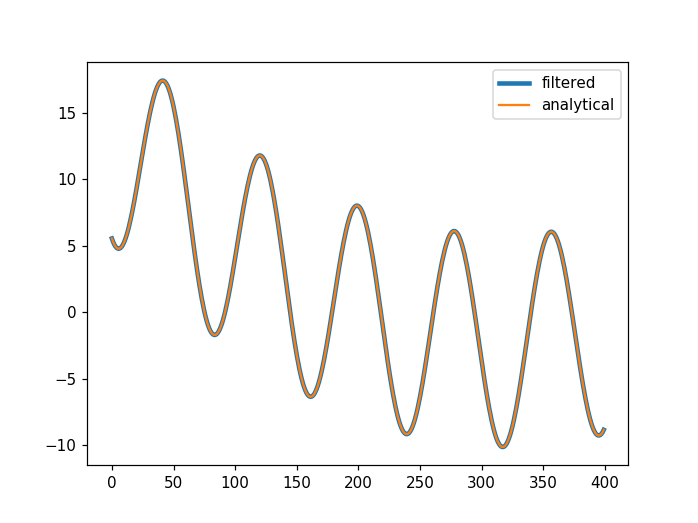

In [4]:
delta = signal[1,0]-signal[0,0] # Get the t spacing of the signal
filtered = savgol_filter(signal[:,1], window_length=7, polyorder=3, deriv=1, delta=delta)

t = signal[:,0]
analytical = 8*np.cos(8*t)-1.8*2*t+0.5*3*t**2

fig, ax = plt.subplots(1,1) # Needed to not replot in the previous figure
ax.plot(filtered, label="filtered", lw=3)
ax.plot(analytical, label="analytical")
ax.legend();

**Answer to question 12.1(d):** Similar to answer **12.1(c)**

**(e)**  Create a Savitzky&ndash;Golay filter for smoothing of the signal with noise.
Here, you have to experiment with the window size to use. Use a polynomial
order of $3$, and compare your smoothed signal with the original signal, and
the signal without noise.



<IPython.core.display.Javascript object>


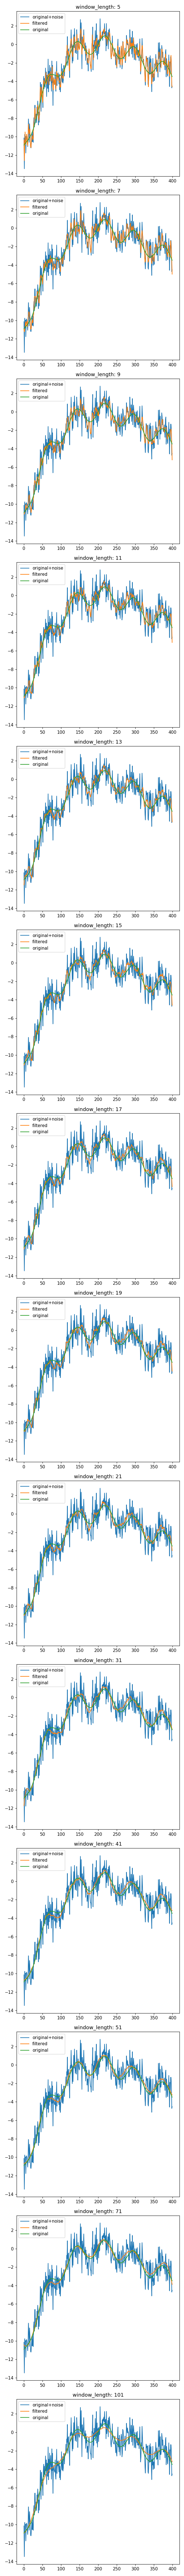

In [5]:
windows = list(range(5,22,2))
windows += [31,41,51,71, 101]
fig, axs = plt.subplots(len(windows), 1, figsize=(6, 6*len(windows)))
axs = axs.flatten()
for window, ax in zip(windows, axs):
    filtered = savgol_filter(signal_noise[:,1], window_length=window, polyorder=3)
    ax.plot(signal_noise[:, 1], label="original+noise")
    ax.plot(filtered, label="filtered")
    ax.plot(signal[:, 1], label="original")
    ax.set_title("window_length: {}".format(window))
    ax.legend()
fig.tight_layout()

**Answer to question 12.1(e):** A bigger window gives smoother signal after filtering, which becomes closer and closer to the original signal. Untill you pass the "period" of your signal, where it smoothes out to much 

**(f)**  Create a Savitzky&ndash;Golay filter for first-order differentiation of the signal
with noise. Here, you have to experiment with the window size to use.
Use a polynomial order of $3$ and compare your differentiated signal
with the analytical derivative of Eq. 1.


<IPython.core.display.Javascript object>


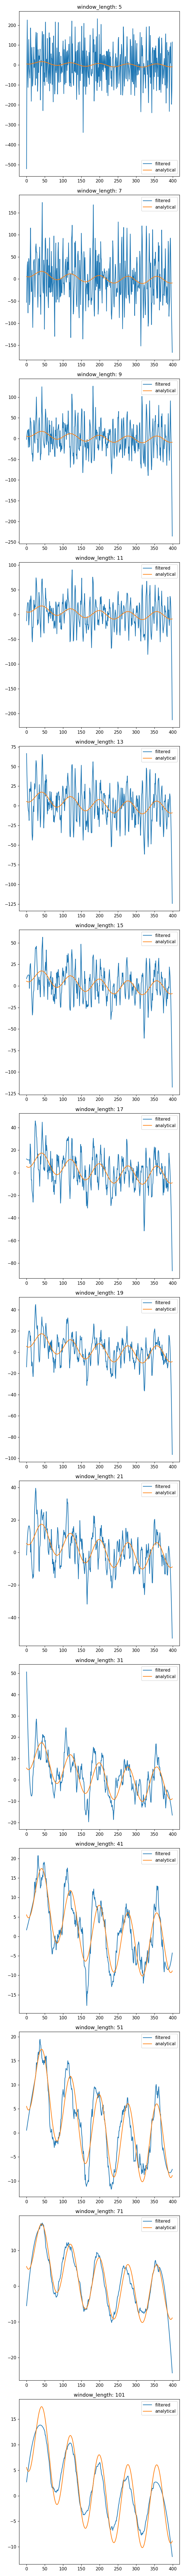

In [6]:
fig, axs = plt.subplots(len(windows), 1, figsize=(6, 6*len(windows)))
axs = axs.flatten()
for window, ax in zip(windows, axs):
    filtered = savgol_filter(signal_noise[:,1], window_length=window, polyorder=3, deriv=1, delta=delta)
    ax.plot(filtered, label="filtered")
    ax.plot(analytical, label="analytical")
    ax.set_title("window_length: {}".format(window))
    ax.legend()
fig.tight_layout()

**Answer to question 12.1(f):** You need a wider window to fit for the derivative, but it is also more stable for wider windows



**Exercise 12.2**

In this exercise, we will try to smooth by performing convolution.
We will attempt to smooth the signal given in Eq. 1
with added noise (data file: `Data/signal_noise.txt`). A short example
on performing convolution with `numpy`:
```python
import numpy as np

signal = np.loadtxt('Data/signal_noise.txt')[:, 1]  # Load signal.
window = np.bartlett(21)  # Create a triangular window.
window /= window.sum()  # Normalize the window.
conv = np.convolve(signal, window, mode='same')  # Calculate convolution.
```


**(a)**  Select a windowing function (A list of the available windowing
functions in `numpy` can be found at [here](https://docs.scipy.org/doc/numpy/reference/routines.window.html)
and use this to smooth the signal by convolution. Compare your
smoothed signal with the raw data and the analytical expression
without noise (Eq. 1).



<IPython.core.display.Javascript object>


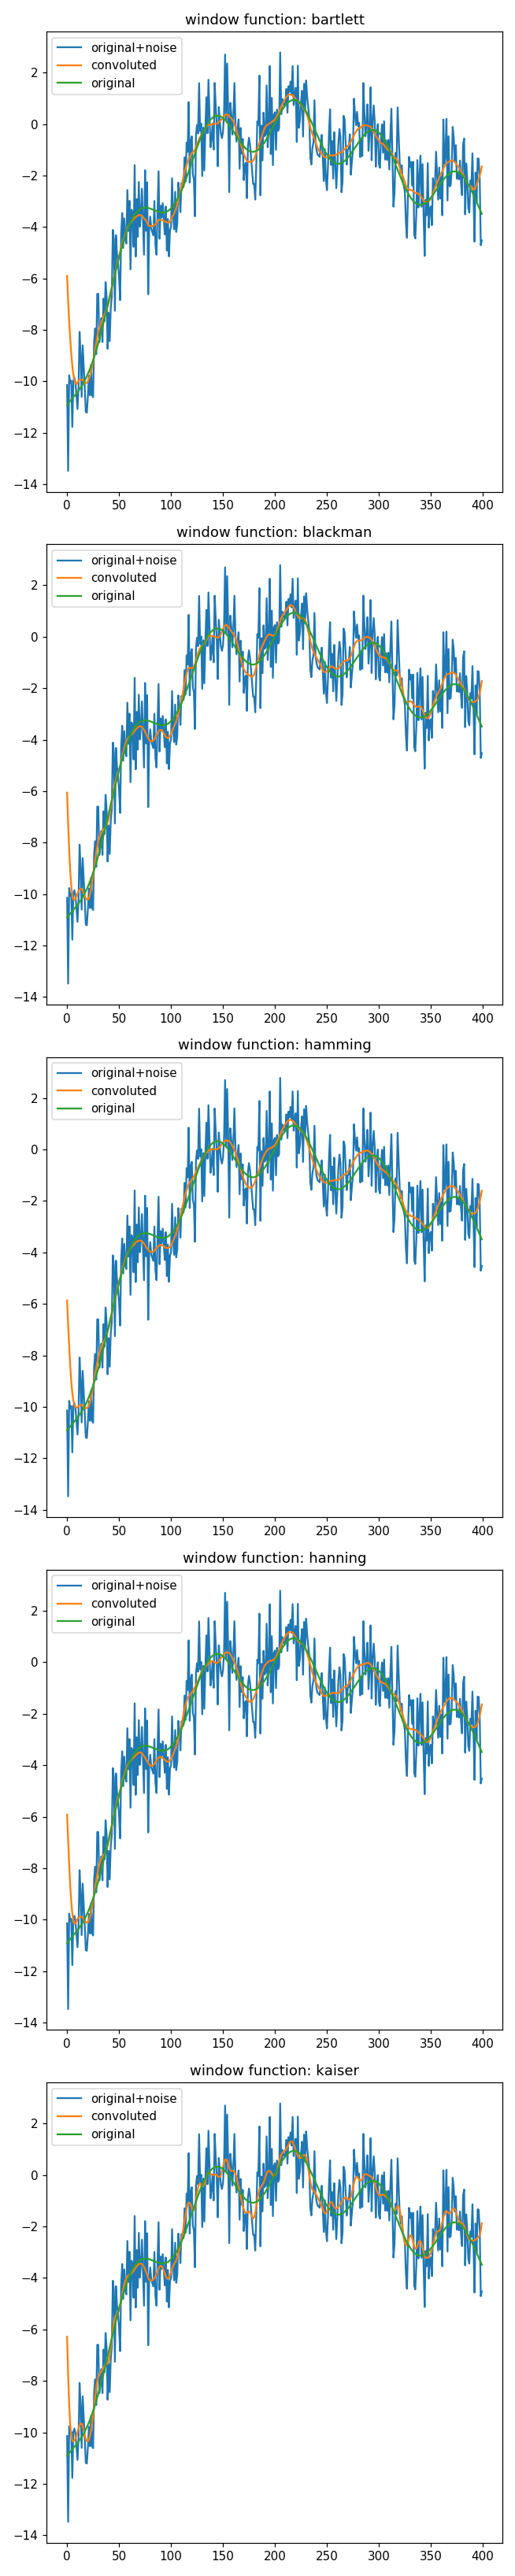

In [7]:
funcs = [("bartlett", np.bartlett),
         ("blackman", np.blackman),
         ("hamming", np.hamming),
         ("hanning", np.hanning),
         ("kaiser", np.kaiser)]


beta = 14 #from numpy docs

fig, axs = plt.subplots(len(funcs), 1, figsize=(6, 6*len(funcs)))
axs = axs.flatten()

for (name, func), ax in zip(funcs, axs):
    if name == "kaiser":
        window = func(21, beta=beta)
    else:
        window = func(21)
    window /= window.sum()
    conv = np.convolve(signal_noise[:,1], window, mode='same')
    ax.plot(signal_noise[:, 1], label="original+noise")
    ax.plot(conv, label="convoluted")
    ax.plot(signal[:, 1], label="original")
    ax.set_title("window function: {}".format(name))
    ax.legend()
fig.tight_layout()

**(b)**  Create a windowing function which is "rectangular": constant for a small and
finite region, and zero otherwise. Use this function to smooth the signal, and
compare it with the raw data and Eq. 1.


<IPython.core.display.Javascript object>


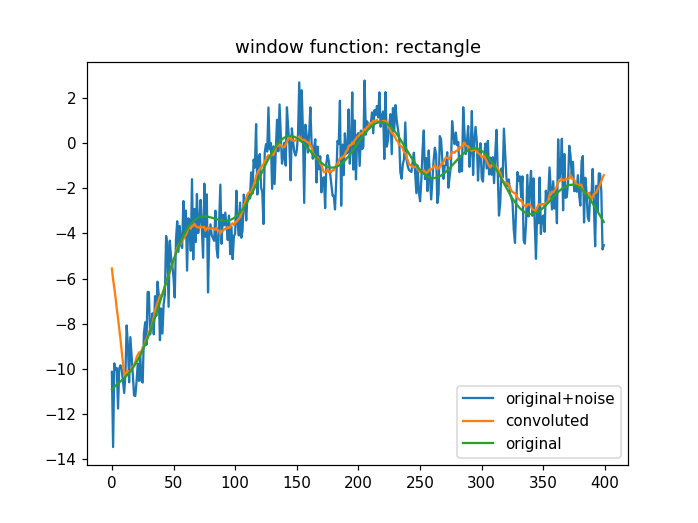

In [8]:
name = "rectangle"
fig, ax = plt.subplots(1,1)
window = np.ones((21))
window /= window.sum()
conv = np.convolve(signal_noise[:,1], window, mode='same')
ax.plot(signal_noise[:, 1], label="original+noise")
ax.plot(conv, label="convoluted")
ax.plot(signal[:, 1], label="original")
ax.set_title("window function: {}".format(name))
ax.legend();

**Answer to question 12.2(b):** The simple rectanglular filter is better than the above mentioned filtering methods to reduce the noise.


**Exercise 12.3**

We will now investigate a noise signal that contains an artificially added
trend. We will try to remove this trend and locate the peaks present in the signal.


**(a)**  Consider the signal given in `Data/peaks.txt`. 
Use a third-order polynomial to estimate the trend in the data.
Subtract this trend from the raw data and plot the resulting signal.



<IPython.core.display.Javascript object>


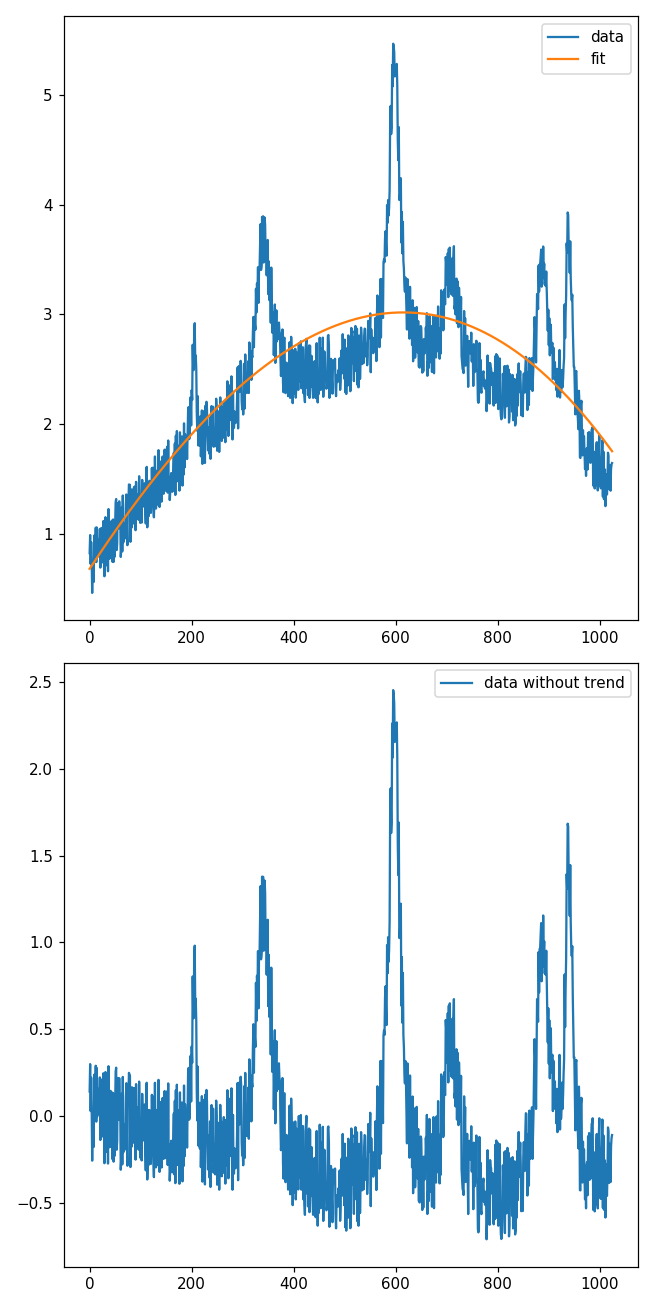

In [9]:
data = np.loadtxt("Data/peaks.txt")
fig, axs = plt.subplots(2,1, figsize=(6, 12))
axs = axs.flatten()
x = np.arange(len(data))
coef = np.polyfit(x, data, deg=3)
yhat = np.polyval(coef, x)

data_no_trend = data-yhat

axs[0].plot(data, label="data")
axs[0].plot(yhat, label="fit")
axs[0].legend()
axs[1].plot(data_no_trend, label='data without trend')
axs[1].legend()
fig.tight_layout()

**(b)** Smooth the signal with the trend removed (either by
convolution or by using a Savitzky-Golay
filter) and plot the smoothed signal. Identify the $6$ main peaks present
in the signal. 

<IPython.core.display.Javascript object>


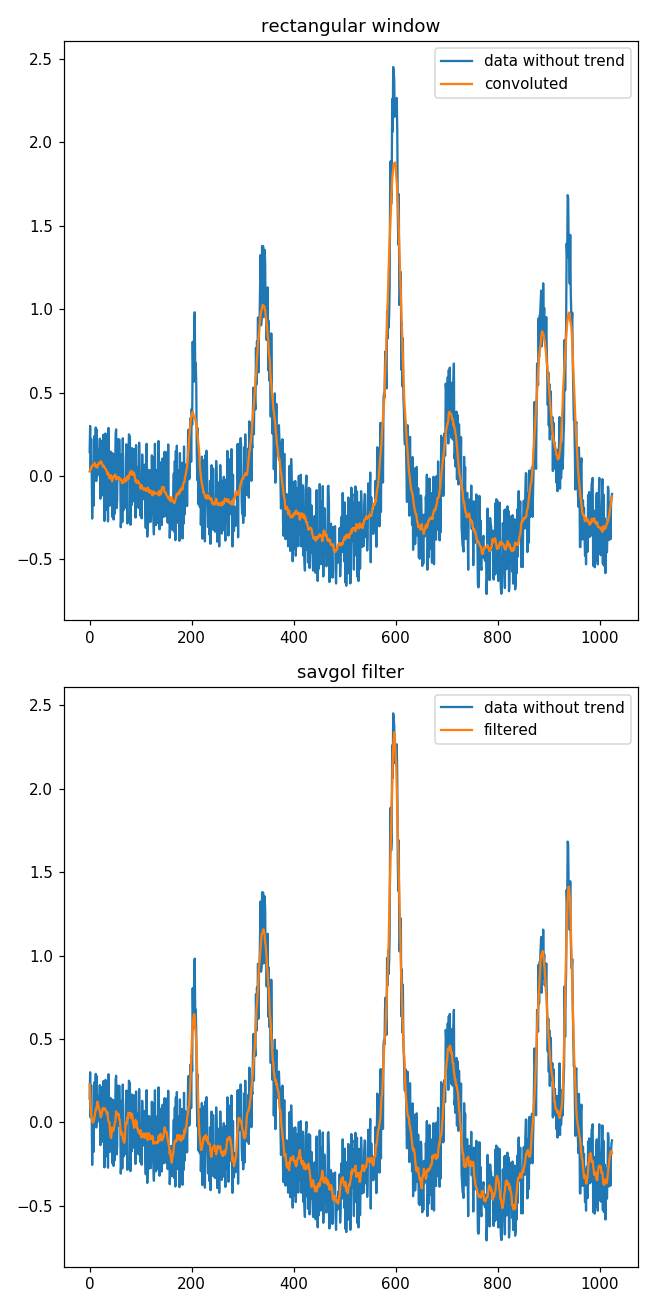

In [10]:
fig, axs = plt.subplots(2,1, figsize=(6, 12))
axs = axs.flatten()
window = np.ones((21))
window /= window.sum()
conv = np.convolve(data_no_trend, window, mode='same')

filtered = savgol_filter(data_no_trend, window_length=21, polyorder=3)



axs[0].plot(data_no_trend, label="data without trend")
axs[0].plot(conv, label="convoluted")
axs[0].legend()
axs[0].set_title("rectangular window")


axs[1].plot(data_no_trend, label="data without trend")
axs[1].plot(filtered, label="filtered")
axs[1].legend()
axs[1].set_title("savgol filter")

fig.tight_layout()


**Answer to question 12.3(b):** The window convolution leads to less noise on the baseline, but more distorted peaks, while the Savitzky-Golay filter does the opposite 


**Exercise 12.4**

You have measured the signal given in the file `Data/spike.txt`. Unfortunately, 
the signal contains a prominent spike that you would like to remove.

**(a)**  Process the signal by convolution. Use a window of your choice,
for instance, the [Bartlett](https://en.wikipedia.org/wiki/Window_function#Triangular_window) window.
Are you able to remove the spike?



<IPython.core.display.Javascript object>


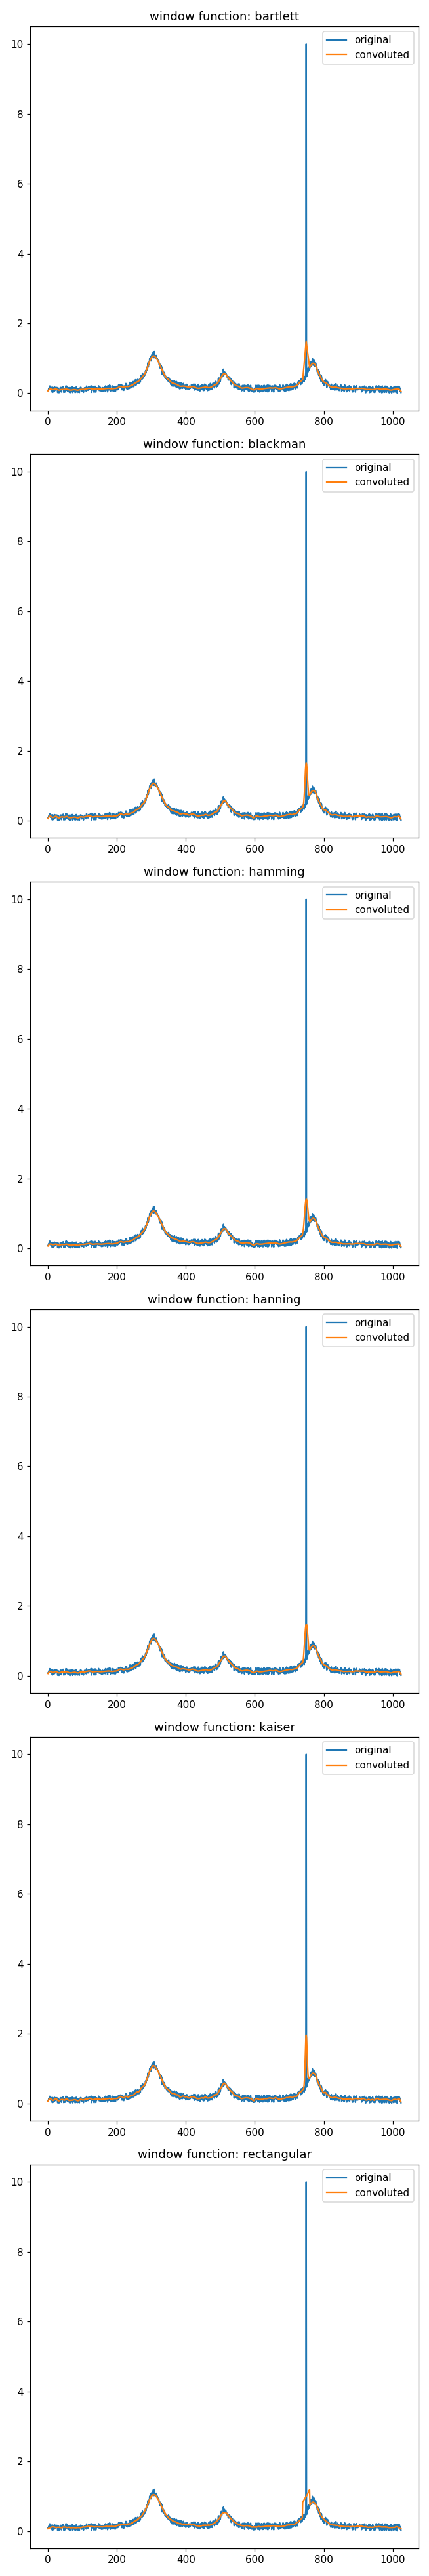

In [11]:
data = np.loadtxt("Data/spike.txt")

funcs = [("bartlett", np.bartlett),
         ("blackman", np.blackman),
         ("hamming", np.hamming),
         ("hanning", np.hanning),
         ("kaiser", np.kaiser),
         ("rectangular", np.ones)]


beta = 14 #from numpy docs

fig, axs = plt.subplots(len(funcs), 1, figsize=(6, 6*len(funcs)))
axs = axs.flatten()

for (name, func), ax in zip(funcs, axs):
    if name == "kaiser":
        window = func(21, beta=beta)
    else:
        window = func(21)
    window /= window.sum()
    conv = np.convolve(data, window, mode='same')
    ax.plot(data, label="original")
    ax.plot(conv, label="convoluted")
    ax.set_title("window function: {}".format(name))
    ax.legend()
fig.tight_layout()

**Answer to question 12.4(a):** None of the convolution filters can get rid of this shot noise

**(b)**  Process the signal by implementing a *median* filter.
The median filter
returns the median value of the signal in a given window.
Unfortunately, this filter can not
be expressed as a simple convolution and you will thus have to create
a new method that processes the signal.
Create such a method, and process the signal. Are you able to remove the
spike with this filter?



<IPython.core.display.Javascript object>


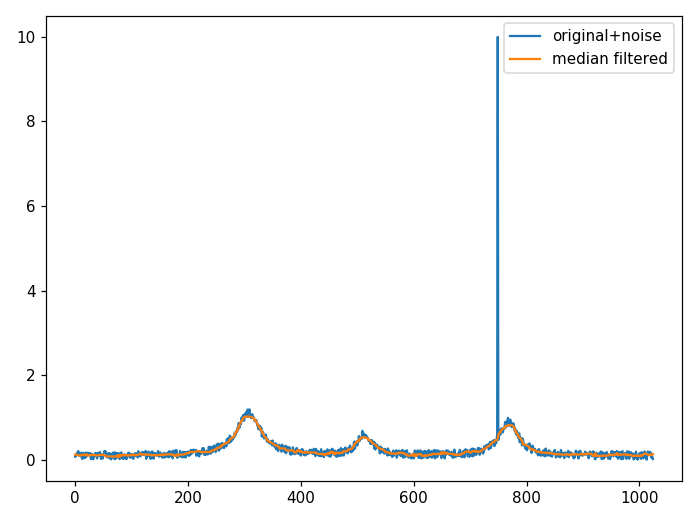

In [12]:
def median_filter(data, window=21):
    l = len(data)
    width = int(window//2)
    out = np.empty_like(data)
    for i in range(l):
        # Figure out the start and end to prevent overrunning at either end with the window
        mi = max(0, i-width) 
        ma = min(l, i+width+1)
        out[i] = np.median(data[mi:ma])
    return(out)

filtered = median_filter(data)

fig, ax = plt.subplots(1,1)

ax.plot(data, label="original+noise")
ax.plot(filtered, label="median filtered")
ax.legend();

fig.tight_layout()

**Answer to question 12.4(b):** That works good enough to filter out the shot noise

**(c)**  Compare the median filter you have created with the convolution results.


**Answer to question 12.4(c):** It works better than the convoluted results to remove the shot noise



**Exercise 12.5**

Multiple Scatter Correction (MSC) is one approach to remove non-linear
effects in near-infrared (NIR) spectra. Such effects may arise as a result
of scattering effects in a sample.
This will generate additional variance which is not related to the
chemical interesting information contained in the spectrum, and we would,
therefore, like to remove it.

The file `Data/nir_msc.txt` contains $222$ spectra which have been
sampled at $121$ wavelengths. Each row contains a spectrum, and each
column represents a single wavelength. You will now apply MSC to
correct these spectra.


**(a)**  Find a representative spectrum by taking the mean of the $222$ spectra.
We will refer to this representative spectrum as $f(x)$ in the following.



<IPython.core.display.Javascript object>


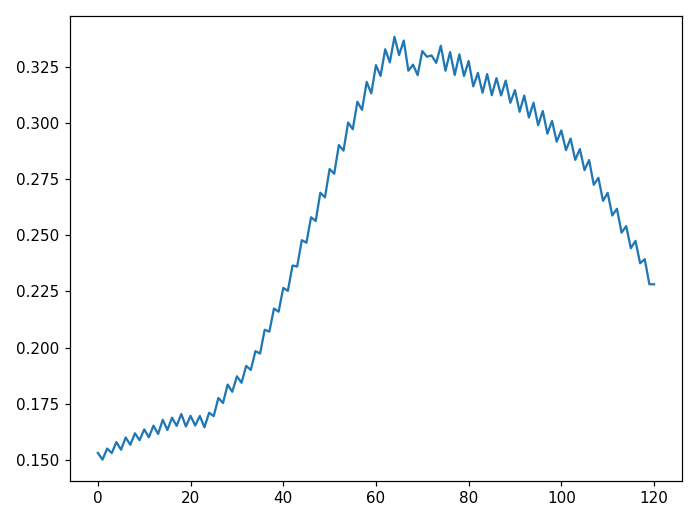

In [13]:
data = np.loadtxt("Data/nir_msc.txt")

mean = np.mean(data, axis=0)

fig, ax = plt.subplots(1,1)
ax.plot(mean, label="mean")
fig.tight_layout()

**(b)**  Correct each spectrum, $h_i(x)$, by first fitting it to a linear
equation,
\begin{equation}
h_i(x) = a_i f(x) + b_i ,
\end{equation}

and then remove the scattering effects by taking,
\begin{equation}
h_{i, \text{corrected}}(x) = \frac{h_i(x) -b_i}{a_i} .
\end{equation}




In [14]:
corrected = data.copy()
for i, row in enumerate(corrected):
    fit = np.polyfit(mean, row, deg=1)
    row -= fit[1]
    row /= fit[0]

**(c)**  Plot the corrected and uncorrected spectra.
Does this look like what you would expect?


<IPython.core.display.Javascript object>


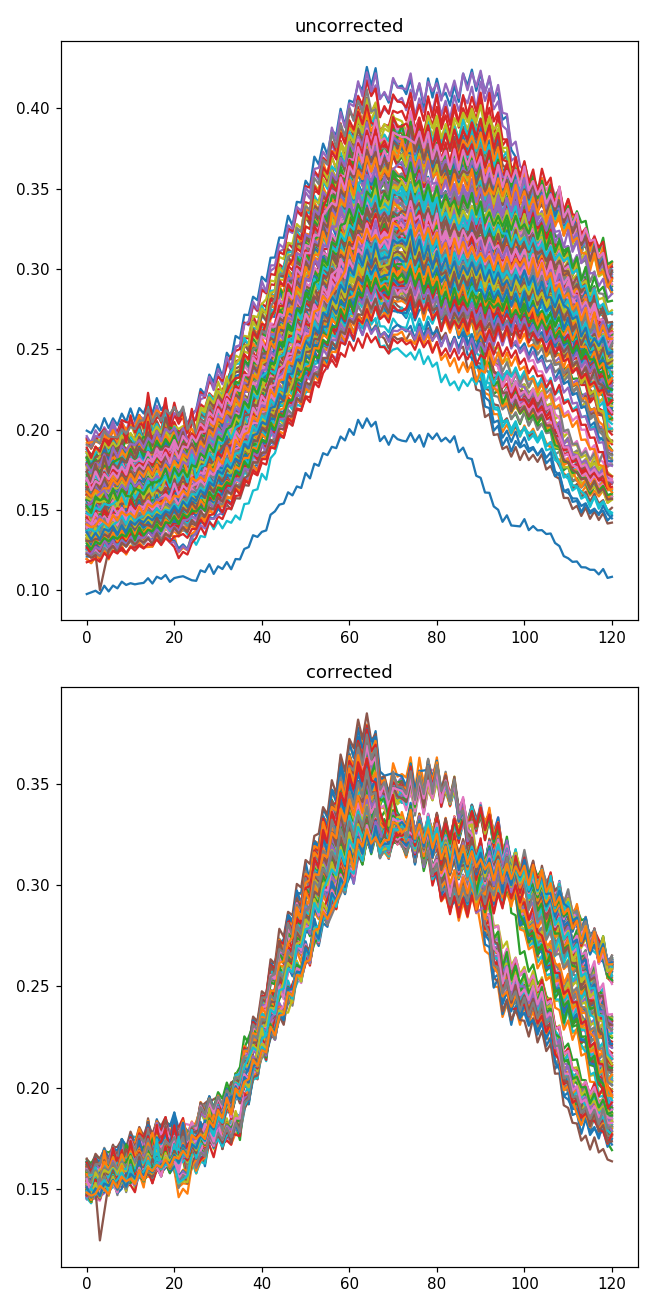

In [15]:
fig, axs = plt.subplots(2,1, figsize=(6,12))
axs  = axs.flatten()

axs[0].plot(data.T)
axs[0].set_title("uncorrected")

axs[1].plot(corrected.T)
axs[1].set_title("corrected")

fig.tight_layout()

**Answer to question 12.5(c):** It does look like expected, as you can see the measured fluctuations in the range 30-60 completely disappear, which indicates some scattering happens in that range

**(d)**  Quantify the effect of the MSC by calculating the sum of squares, $SS_0$,
of the *centered* spectra,
\begin{equation}
SS_0 = \sum_i \sum_j (x_{ij} - \overline{x}_j)^2,
\end{equation}

where $x_{ij}$ is the intensity for spectrum $i$ at wavelength $j$, and
$\overline{x}_j$ is the mean of all spectra for wavelength $j$.
Calculate $SS_0$ for both the corrected and uncorrected spectra.
Are these values as you would expect?



In [16]:
SS0_raw = ((data-mean)**2).sum()
SS0_corrected = ((corrected-corrected.mean(axis=0))**2).sum()
print("SS0 raw: {}".format(SS0_raw))
print("SS0 corrected: {}".format(SS0_corrected))

SS0 raw: 30.652283772034313
SS0 corrected: 6.540032788542829


**Answer to question 12.5(d):** This is what you would expect, as it would reduce varriance coming from scattering effects. 

**(e)**  A simple alternative to MSC is to "auto-scale" each spectrum,
\begin{equation}
h_{i, \text{auto-scale}}(x) = \frac{h_i(x) - \overline{h}_i}{\sigma_i},
\end{equation}

where $h_i(x)$ is the original spectrum, $\overline{h}_i$ its average, and
$\sigma_i$ the standard deviation of the spectrum. Apply this to the
original spectra, and compare with the uncorrected spectra and the MSC spectra.


<IPython.core.display.Javascript object>


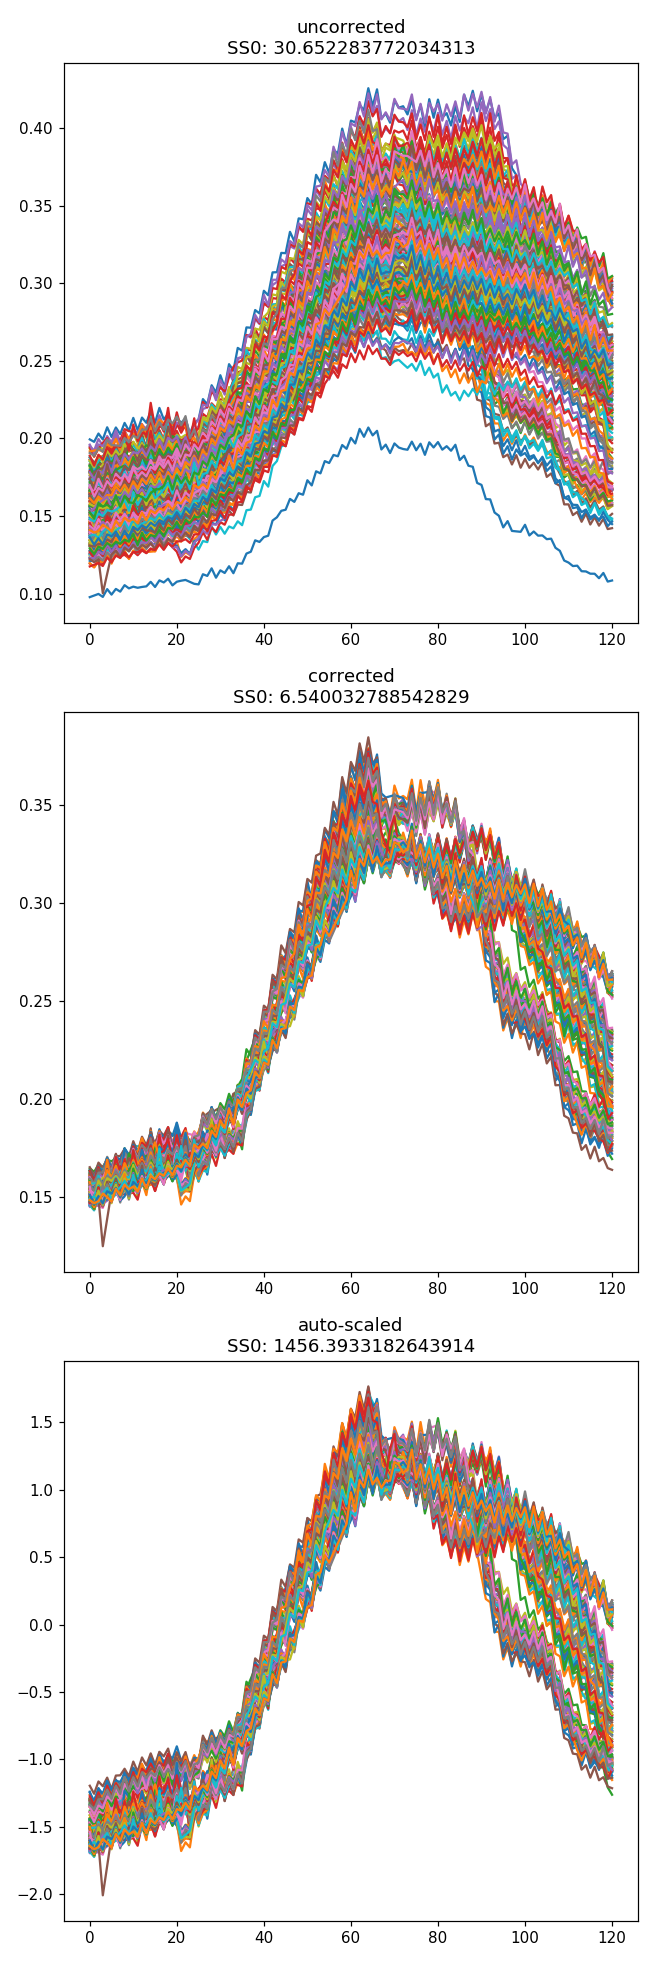

In [17]:
auto_scaled = data.copy()
for row in auto_scaled:
    std = row.std()
    row -= row.mean()
    row /= std

SS0_auto = ((auto_scaled-auto_scaled.mean(axis=0))**2).sum()
    
fig, axs = plt.subplots(3,1, figsize=(6,18))
axs  = axs.flatten()

axs[0].plot(data.T)
axs[0].set_title("uncorrected\nSS0: {}".format(SS0_raw))

axs[1].plot(corrected.T)
axs[1].set_title("corrected\nSS0: {}".format(SS0_corrected))

axs[2].plot(auto_scaled.T)
axs[2].set_title("auto-scaled\nSS0: {}".format(SS0_auto))

fig.tight_layout()

**Answer to question 12.5(e):** Doing the auto-scaling results in similar spectra as MSC ([related by a linear transformation](https://doi.org/10.1255/jnirs.30)). But with a higher variance.